# Exercise 4 (Johannes Signer)

The purpose of this exercise is to tackle a simple question with JupyterLab, commit it to Github and finally to mybinder.

# 1. Data analysis
When loading packages, make sure they are also added to the file `install.R`, so mybinder will install them too.

In [12]:
# Load packages that we may need later
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



First we have to read the data, we can do this directly from GitHub, since the data are posted there: 

In [19]:
try <- read.csv("https://raw.githubusercontent.com/NFDI4Biodiversity/SeasonalSchool2024/refs/heads/main/day4/practical_session4/data/try_reduced.csv")
gbif <- read.csv("https://raw.githubusercontent.com/NFDI4Biodiversity/SeasonalSchool2024/refs/heads/main/day4/practical_session4/data/gbif_bioclim.csv")

In [10]:
head(try)
head(gbif)

,X,SpeciesName,TraitName,StdValue,UnitName
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1,Castanea sativa,Seed dry mass,1433.000,mg
2,2,Fagus sylvatica,Seed dry mass,158.000,mg
3,3,Larix decidua,Seed dry mass,6.244,mg
4,4,Picea sitchensis,Seed dry mass,2.940,mg
5,5,Pinus sylvestris,Seed dry mass,6.190,mg
6,6,Quercus cerris,Seed dry mass,1900.000,mg


,scientificName,countryCode,species,x,y,BIO1,BIO2,BIO3,BIO4,BIO5,⋯,BIO10,BIO11,BIO12,BIO13,BIO14,BIO15,BIO16,BIO17,BIO18,BIO19
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Quercus robur L.,DE,Quercus robur,13.197520,52.48053,282.8060,11.56009,23.40577,697.0049,301.5184,⋯,290.7341,275.1877,0.6891775,0.2492599,0.0022743340,4.280466,9.223780,7.968918,9.223780,8.198037
2,Fagus sylvatica L.,DE,Fagus sylvatica,10.635290,52.13933,282.2700,11.56496,24.08731,652.6573,300.2569,⋯,289.7771,275.1406,0.7945873,0.2119986,0.0041780071,3.993065,10.366795,9.318233,10.366795,9.613353
3,Quercus palustris Münchh.,DE,Quercus palustris,12.388285,51.36412,282.7631,11.80689,23.66432,689.1375,300.6205,⋯,290.6756,275.2898,0.7198712,0.1815318,0.0009142933,3.985592,9.298201,8.278377,9.298201,8.949971
4,Quercus robur L.,DE,Quercus robur,12.510908,50.72724,281.6990,12.49376,31.00520,682.9493,299.1687,⋯,289.4790,274.2594,0.9505705,0.2147094,0.0017349567,3.853150,12.087655,11.246518,12.087655,11.700603
5,Fagus sylvatica L.,DE,Fagus sylvatica,9.592076,51.47528,281.8596,11.29835,28.98178,635.9584,299.1519,⋯,289.1873,274.9467,0.8459014,0.2779124,0.0020681862,3.920097,10.731586,10.196636,10.731586,10.449787
6,Quercus robur L.,DE,Quercus robur,12.791288,53.45432,282.0240,10.56826,22.84456,674.8423,299.6821,⋯,289.7753,274.4990,0.7309243,0.2611389,0.0026327982,4.086557,9.681484,8.469324,9.681484,8.544147


Let's pick a variable of interest (I will use "Plant height vegetative").


In [22]:
try_height <- try |> filter(TraitName == "Plant height vegetative") |> 
  group_by(SpeciesName) |> 
  summarise(var_height = var(StdValue, na.rm = TRUE), n = n())


# Summarize environmentla covariate
gbif_temp <- gbif |> group_by(species) |> 
  summarize(var_temp = var(BIO1, na.rm = TRUE))

dat <- left_join(gbif_temp, try_height, by = c("species" = "SpeciesName"))



Now we can take this data and create a plot.

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


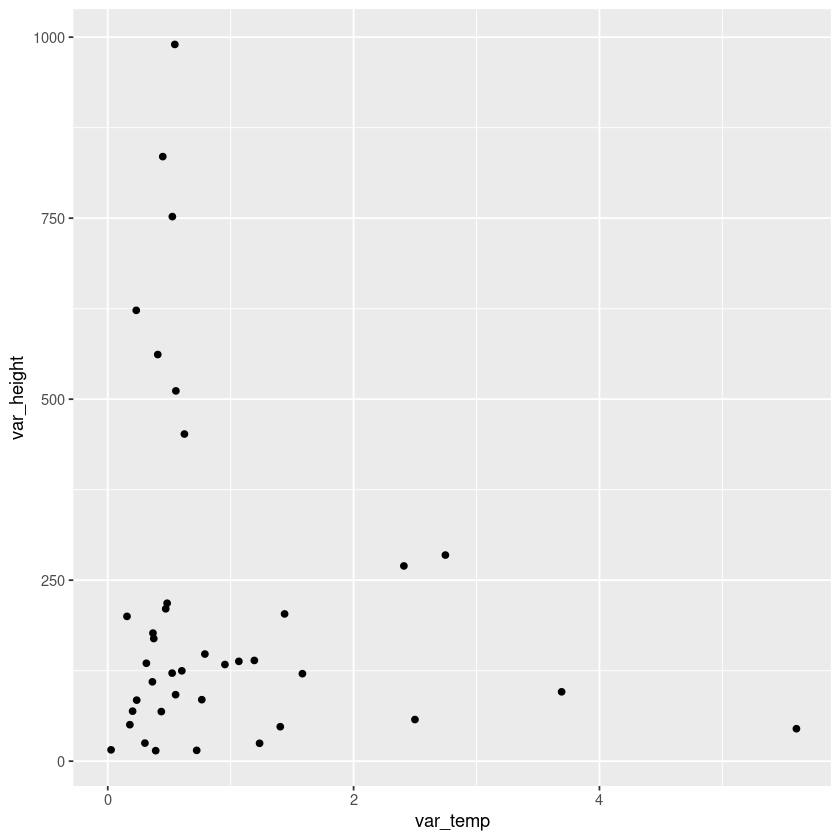

In [25]:
a <- 1:10
ggplot(dat, aes(var_temp, var_height)) + geom_point()

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


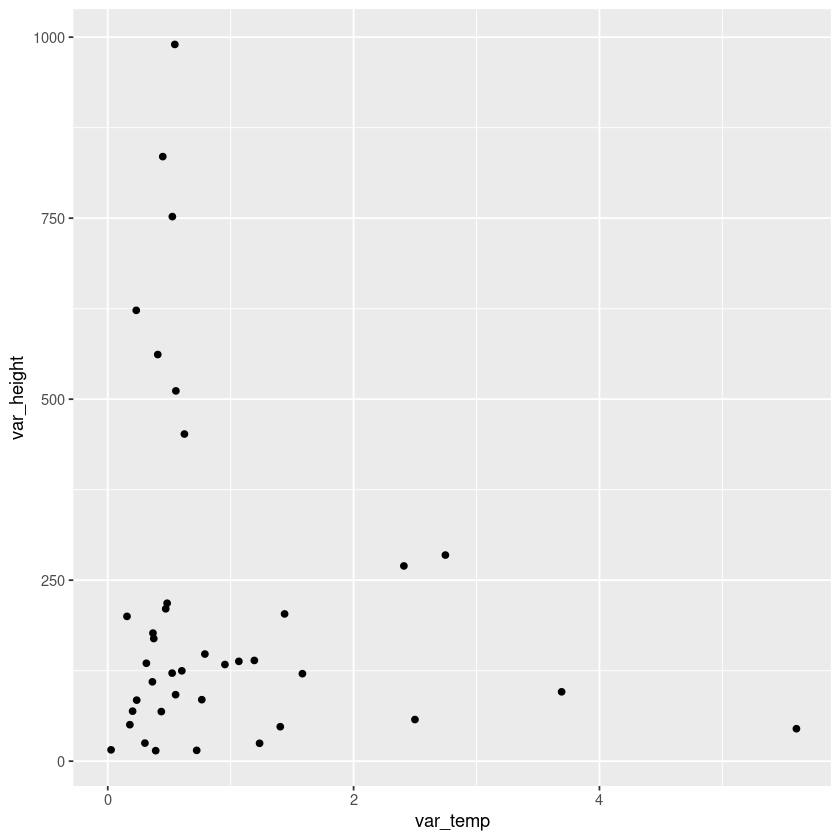

In [25]:
ggplot(dat, aes(var_temp, var_height)) + geom_point()